# 2D CNN Aproach with scalogram

## Imports and setup

In [1]:
import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D

from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option('display.max_rows', 100)
np.set_printoptions(formatter={'all':lambda x: str(x)})
pd.options.display.float_format = '{:.2f}'.format

## Classes and functions

In [2]:
class CNN:
    def __init__(self, input_shape):
        
        self.model = Sequential()
        self.model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
        self.model.add(Conv2D(32, kernel_size=3, activation='relu'))
        self.model.add(Conv2D(16, kernel_size=3, activation='relu'))
        self.model.add(MaxPool2D(pool_size=2, strides=2))
        self.model.add(Flatten())
        self.model.add(Dense(units=128, activation='relu'))
        self.model.add(Dense(1, activation="sigmoid"))
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    def summary(self):
        self.model.summary()

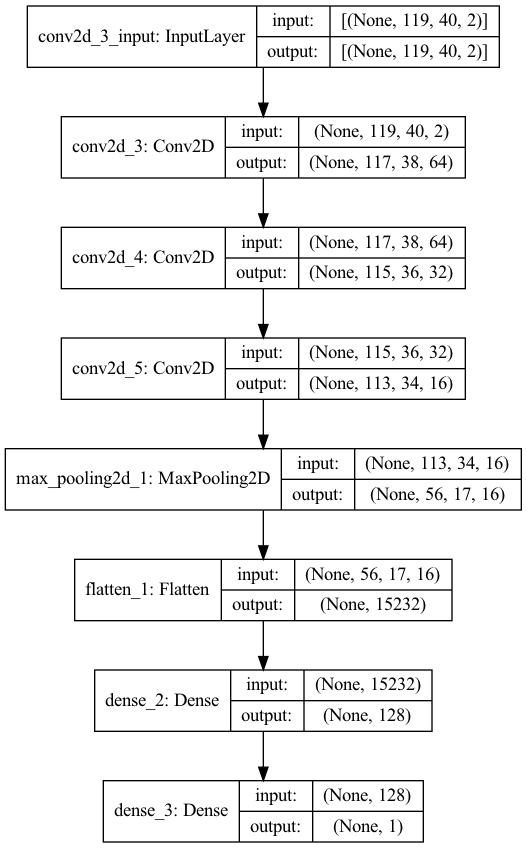

In [8]:
input_shape = (119, 40, 2)
cnn = CNN(input_shape)
file = f"/Users/mykytaprokayev/Documents/TUM/Master Thesis/Presentation_images/2dcnn_structure.png"
plot_model(cnn.model,to_file=file,show_shapes=True)

## Dataset choice

In [5]:
datasets = os.listdir(f'datasets/')
datasets.sort()
datasets.pop(0)
models = os.listdir(f'Models/')

print("Available datasets:")
counter = 1
for dataset in datasets:
    if f'{dataset}' in models:
        print(f'{counter}) {dataset} - Model Exists!')
    else:
        print(f'{counter}) {dataset}')
    counter += 1
print("\n")     
chosen_dataset = int(input("Choose dataset number: "))
dataset_name = datasets[chosen_dataset-1]

Available datasets:
1) B1_sigmoid&B2_sigmoid&MB_sigmoid&BMB_sigmoid-40L20S60T - Model Exists!
2) B1_sigmoid&B2_temp&MB_temp&BMB_temp-40L20S60T - Model Exists!
3) B1_sigmoid-20L10S60T - Model Exists!
4) B1_sigmoid-40L10S60T - Model Exists!
5) B1_sigmoid-40L20S60T - Model Exists!
6) B1_sigmoid-40L40S60T - Model Exists!
7) B1_sigmoid-80L40S60T - Model Exists!
8) B1_sigmoid-80L80S60T - Model Exists!
9) B1_temp&B2_temp&MB_temp&BMB_temp-40L20S60T - Model Exists!
10) B1_temp&B2_temp&MB_temp&BMB_temp-80L80S60T
11) B1_temp-40L20S60T - Model Exists!
12) BCR_1_Power-40L20S60T
13) MB_sigmoid&BMB_sigmoid&B1_sigmoid&B2_sigmoid-40L20S60T
14) MB_sin&BMB_sigmoid&B1_sigmoid&B2_inclined-40L20S60T
15) MB_temp&BMB_temp&B1_sigmoid&B2_temp-40L20S60T
16) MB_temp&BMB_temp&B1_temp&B2_temp-10L10S60T
17) MB_temp&BMB_temp&B1_temp&B2_temp-40L20S60T
18) MB_temp&BMB_temp&B1_temp&B2_temp-5L5S60T
19) MB_temp-20L20S60T
20) MB_temp-40L10S60T
21) MB_temp-40L20S60T
22) MB_temp-40L40S60T
23) MB_temp-40L5S60T
24) PDM Power A

In [6]:
x_train = np.load(f'datasets/{dataset_name}/x_train.npy')
y_train = np.load(f'datasets/{dataset_name}/y_train.npy')

input_shape = x_train[0].shape
print(input_shape)

(119, 20, 2)


In [24]:
x_train = np.load(f'datasets/{dataset_name}/x_train.npy')
y_train = np.load(f'datasets/{dataset_name}/y_train.npy')

input_shape = x_train[0].shape
print(input_shape)

cnn = CNN(input_shape)
cnn.model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.25)

path = f"models/{dataset_name}"
cnn.model.save(path)

Epoch 1/10
94/94 [==============================] - 19s 190ms/step - loss: 0.2227 - accuracy: 0.9807 - val_loss: 1.0381e-04 - val_accuracy: 1.0000
Epoch 2/10
94/94 [==============================] - 16s 172ms/step - loss: 5.5699e-04 - accuracy: 1.0000 - val_loss: 7.9929e-05 - val_accuracy: 1.0000
Epoch 3/10
94/94 [==============================] - 15s 162ms/step - loss: 5.0819e-05 - accuracy: 1.0000 - val_loss: 3.3228e-05 - val_accuracy: 1.0000
Epoch 4/10
94/94 [==============================] - 15s 164ms/step - loss: 2.4678e-05 - accuracy: 1.0000 - val_loss: 1.9116e-05 - val_accuracy: 1.0000
Epoch 5/10
94/94 [==============================] - 16s 174ms/step - loss: 1.5354e-05 - accuracy: 1.0000 - val_loss: 1.2819e-05 - val_accuracy: 1.0000
Epoch 6/10
94/94 [==============================] - 17s 184ms/step - loss: 1.0697e-05 - accuracy: 1.0000 - val_loss: 9.3253e-06 - val_accuracy: 1.0000
Epoch 7/10
94/94 [==============================] - 16s 171ms/step - loss: 7.9726e-06 - accuracy: 